# Synergy Score computation and visualization

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df_1 = _deepnote_execute_sql('SELECT champName1, champId1, champName2, champId2, occurTime, winTime, (occurTime-winTime) As loseTime, CAST(CAST((winTime-loseTime) AS DECIMAL(10,2))/CAST(occurTime AS DECIMAL(10,2)) AS DECIMAL(10,4)) AS synergy_score\nFROM table2_name.csv', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,champName1,champId1,champName2,champId2,occurTime,winTime,loseTime,synergy_score
0,Caitlyn,51,Lux,99,3195,1729,1466,0.0823
1,Ezreal,81,Bard,432,2789,1443,1346,0.0348
2,Morgana,25,Caitlyn,51,2688,1373,1315,0.0216
3,Ezreal,81,Camille,164,2203,1086,1117,-0.0141
4,Karma,43,Ezreal,81,2149,982,1167,-0.0861
...,...,...,...,...,...,...,...,...
10916,Draven,119,Aphelios,523,2,2,0,1.0000
10917,Gangplank,41,Aatrox,266,2,2,0,1.0000
10918,Elise,60,Nidalee,76,1,0,1,-1.0000
10919,JarvanIV,59,Nidalee,76,1,0,1,-1.0000


In [9]:
df_1.to_csv('synergy_raw.csv', index = False)
df_1.head(10)

,champName1,champId1,champName2,champId2,occurTime,winTime,loseTime,synergy_score
0,Caitlyn,51,Lux,99,3195,1729,1466,0.0823
1,Ezreal,81,Bard,432,2789,1443,1346,0.0348
2,Morgana,25,Caitlyn,51,2688,1373,1315,0.0216
3,Ezreal,81,Camille,164,2203,1086,1117,-0.0141
4,Karma,43,Ezreal,81,2149,982,1167,-0.0861
5,Ashe,22,Camille,164,1965,1072,893,0.0911
6,Ezreal,81,Akali,84,1924,930,994,-0.0333
7,Camille,164,Jhin,202,1823,970,853,0.0642
8,Caitlyn,51,Camille,164,1810,954,856,0.0541
9,Ashe,22,Akali,84,1758,872,886,-0.0080


In [10]:
df_2 = _deepnote_execute_sql('SELECT na1.champName as champName1, synergy.champId1, na2.champName as champName2, synergy.champId2, synergy.synergy_score\nFROM(\n    SELECT id.champId1, id.champId2, COALESCE(d.synergy_score, 0) as synergy_score\n    FROM(   \n        SELECT DISTINCT greatest(n1.champId, n2.champId) as champId1, least(n1.champId, n2.champId) as champId2\n        FROM \'names.csv\' n1, \'names.csv\' n2\n        ) as id\n    LEFT JOIN df_1 as d\n    ON id.champId1 = d.champId2 and id.champId2 = d.champId1\n    ) as synergy\nJOIN \'names.csv\' na1 ON synergy.champId1 = na1.champId\nJOIN \'names.csv\' na2 ON synergy.champId2 = na2.champId\nORDER BY champId2, champid1', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,champName1,champId1,champName2,champId2,synergy_score
0,Annie,1,Annie,1,0.0000
1,Olaf,2,Annie,1,0.0811
2,Galio,3,Annie,1,0.3750
3,TwistedFate,4,Annie,1,0.0000
4,XinZhao,5,Annie,1,-0.3333
...,...,...,...,...,...
11320,Sett,875,Yone,777,-0.1168
11321,Lillia,876,Yone,777,-0.1281
11322,Sett,875,Sett,875,0.0000
11323,Lillia,876,Sett,875,-0.0366


In [11]:
df_2.to_csv('synergy.csv', index = False)

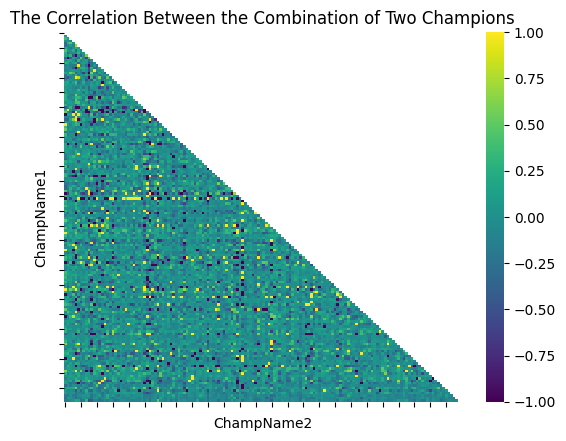

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('synergy.csv')

corr_matrix = df.pivot(index='champId1', columns='champId2', values='synergy_score')
heatmap = sns.heatmap(corr_matrix, cmap='viridis', annot=False, mask=np.triu(np.ones_like(corr_matrix)), vmin=-1, vmax=1)
# Hide the x-axis and y-axis labels
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.title('The Correlation Between the Combination of Two Champions')
heatmap.set_xlabel("ChampName2")
heatmap.set_ylabel("ChampName1")
plt.show()


In [13]:
df_3 = _deepnote_execute_sql('SELECT *\nFROM synergy.csv\nWHERE champId1 IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10) AND\nchampId2 IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,champName1,champId1,champName2,champId2,synergy_score
0,Annie,1,Annie,1,0.0000
1,Olaf,2,Annie,1,0.0811
2,Galio,3,Annie,1,0.3750
3,TwistedFate,4,Annie,1,0.0000
4,XinZhao,5,Annie,1,-0.3333
5,Urgot,6,Annie,1,-0.2727
6,Leblanc,7,Annie,1,0.2000
7,Vladimir,8,Annie,1,0.4286
8,Fiddlesticks,9,Annie,1,0.2727
9,Kayle,10,Annie,1,0.2000


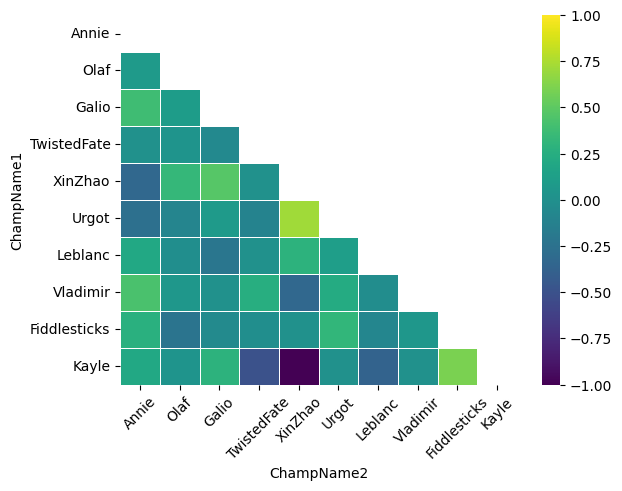

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



corr_matrix = df_3.pivot(index='champId1', columns='champId2', values='synergy_score')
heatmap = sns.heatmap(corr_matrix, cmap='viridis', annot=False, linewidths=.5, mask=np.triu(np.ones_like(corr_matrix)), vmin=-1, vmax=1)

# Define the label mapping
label_mapping = {1: 'Annie', 2: 'Olaf', 3: 'Galio', 4: 'TwistedFate', 5: 'XinZhao', 6: 'Urgot', 7: 'Leblanc', 8: 'Vladimir', 9: 'Fiddlesticks', 10: 'Kayle'}

x_labels = [label_mapping[int(label.get_text())] for label in heatmap.get_xticklabels()]
heatmap.set_xticklabels(x_labels, rotation = 45)

# Set the y-axis labels
y_labels = [label_mapping[int(label.get_text())] for label in heatmap.get_yticklabels()]
heatmap.set_yticklabels(y_labels, rotation = 0)

heatmap.set_xlabel("ChampName2")
heatmap.set_ylabel("ChampName1")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e55512df-58ef-402e-8f63-17a773fe09fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>